Sample

## Load pre-trained EPiC-FM models

In [1]:
from DynGenModels.configs.registered_experiments import Config_JetClass_EPiC_CondFlowMatch
from DynGenModels.models.experiment import Experiment
from DynGenModels.datamodules.jetclass.dataprocess import PostProcessJetClassData as Postprocessor
from DynGenModels.datamodules.jetclass.dataprocess import PreProcessJetClassData as Preprocessor

from utils import plot_consitutents, plot_jets 

- time emebdding: Gaussian
- dim_time_emebed = 12

/tmp/ipykernel_2033444/3607627145.py:53: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(8)
/tmp/ipykernel_2033444/3607627145.py:61: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax_ratio.set_ylim(0.5, 1.5, 0) # Adjust this as needed
/tmp/ipykernel_2033444/3607627145.py:65: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(7)
/tmp/ipykernel_2033444/3607627145.py:67: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(5)
/tmp/ipykernel_2033444/3607627145.py:99: MatplotlibDeprecationWarning: The label function was deprecat

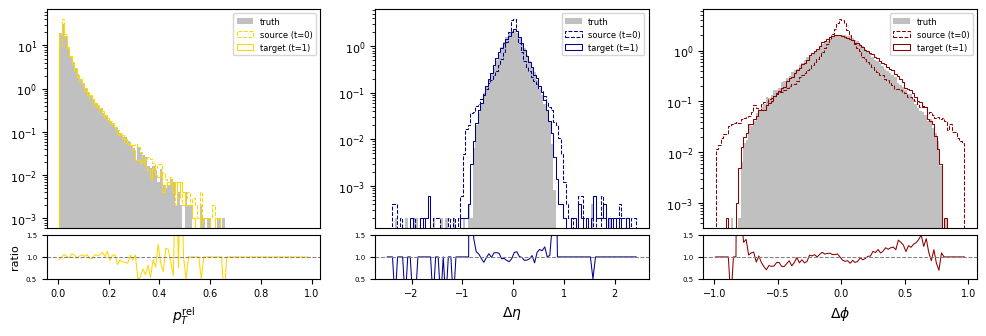

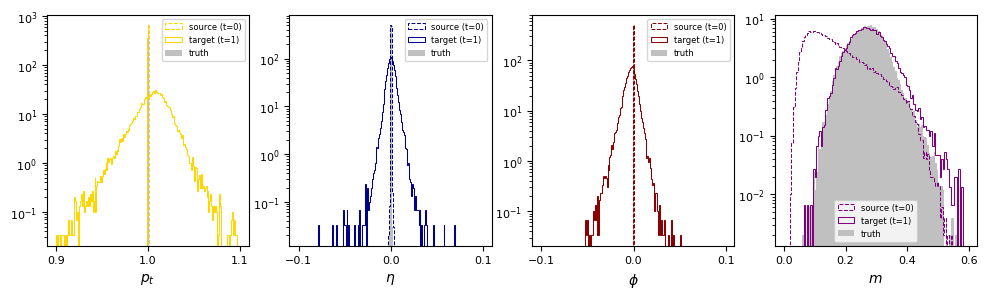

In [9]:
path = '../../results/qcd_to_top_sinus.ConditionalFlowMatching.EPiC.2024.02.18_17h40'
cfm = Experiment(Config_JetClass_EPiC_CondFlowMatch, path=path, DEVICE='cuda:2', )
cfm.load(model='best')

cfm.generate_samples(cfm.dataset.source_preprocess[:20000], Postprocessor=Postprocessor)

plot_consitutents(cfm, save_dir=path, features=[r'$p^{\rm rel}_T$', r'$\Delta\eta$', r'$\Delta\phi$'], figsize=(12,3.5))
plot_jets(cfm, save_dir=path, features=[r'$p_t$', r'$\eta$', r'$\phi$', r'$m$'], figsize=(12,3))

+---------------------+-------------------------+
| Parameters          | Values                  |
+---------------------+-------------------------+
| NAME                | qcd_to_top_sinus        |
| DATASET             | jetclass                |
| DATA_SOURCE         | qcd                     |
| DATA_TARGET         | top                     |
| NUM_CONSTITUENTS    | 30                      |
| FEATURES            | constituents            |
| PREPROCESS          | ['standardize']         |
| DIM_INPUT           | 3                       |
| DEVICE              | cuda:1                  |
| OPTIMIZER           | Adam                    |
| LR                  | 0.0001                  |
| WEIGHT_DECAY        | 0.0                     |
| OPTIMIZER_BETAS     | [0.9, 0.999]            |
| OPTIMIZER_EPS       | 1e-08                   |
| OPTIMIZER_AMSGRAD   | False                   |
| GRADIENT_CLIP       | 1.0                     |
| SCHEDULER           |                         |


2024-02-19 18:29:14.041639: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-19 18:29:15.984931: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-19 18:29:15.992395: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-19 18:29:20.331395: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO: building dataloaders...
INFO: train/val/test split ratios: 0.8/0.2/0.0
INFO: train size: 80000, validation size: 20000, testing sizes: 0
INFO: neural ODE solver with midpoint method and steps=200


  0%|          | 0/20 [00:00<?, ?it/s]

/home/df630/.conda/envs/flow_match_env/lib/python3.9/site-packages/torchdyn/numerics/odeint.py:84: UserWarning: Setting tolerances has no effect on fixed-step methods
  warn("Setting tolerances has no effect on fixed-step methods")


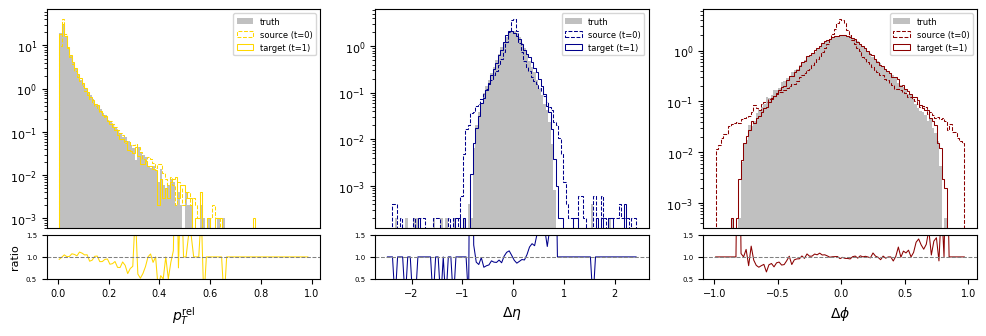

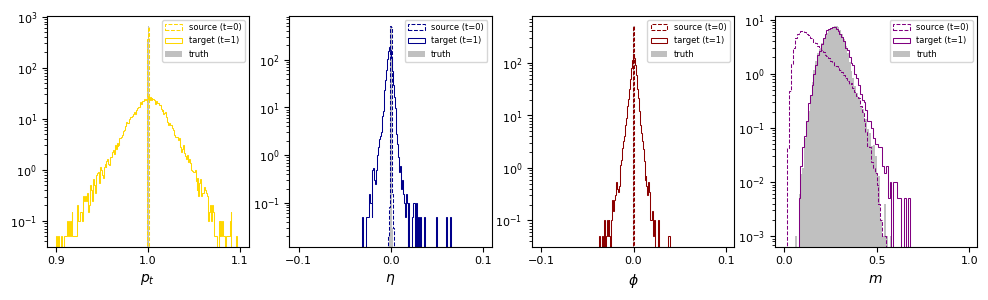

In [2]:
# path = '../../results/qcd_to_top_sinus.ConditionalFlowMatching.EPiC.2024.02.18_16h55'
# cfm = Experiment(Config_JetClass_EPiC_CondFlowMatch, path=path, DEVICE='cuda:2')
# cfm.load(model='best')

# cfm.generate_samples(cfm.dataset.source_preprocess[:20000], Postprocessor=Postprocessor)

plot_consitutents(cfm, save_dir=path, features=[r'$p^{\rm rel}_T$', r'$\Delta\eta$', r'$\Delta\phi$'], figsize=(12,3.5))
plot_jets(cfm, save_dir=path, features=[r'$p_t$', r'$\eta$', r'$\phi$', r'$m$'], figsize=(12,3))

In [ ]:

def plot_consitutents(trained_model, 
                        save_dir=None, 
                        features=[r'$p^{\rm rel}_T$', r'$\Delta\eta$', r'$\Delta\phi$'], 
                        bins=[np.arange(0,1,0.01), np.arange(-2.5, 2.5, 0.05), np.arange(-1, 1, 0.02)], 
                        num_particles=100000, 
                        figsize=(10, 3)):
    
    jet0 = trained_model.pipeline.trajectories[0].reshape(-1,3).detach().cpu().numpy()
    jet1 = trained_model.pipeline.trajectories[-1].reshape(-1,3).detach().cpu().numpy()
    jet_true = trained_model.dataset.target[:jet0.shape[0]].detach().cpu().numpy()
    
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(2, 3, height_ratios=[5, 1])
    gs.update(hspace=0.05) 
    
    for idx, feature in enumerate(features):
        ax = fig.add_subplot(gs[idx])
        h, b, _ = ax.hist(jet_true[..., idx].flatten()[:num_particles], bins=bins[idx], log=True , color='silver', density=True, label='target (truth)')
        h0, _, _ = ax.hist(jet0[..., idx].flatten()[:num_particles], bins=bins[idx], log=True, color=['gold', 'darkblue', 'darkred'][idx], ls='--', histtype='step', density=True, lw=0.75, label='source (t=0)')
        h1, _, _ = ax.hist(jet1[..., idx].flatten()[:num_particles], bins=bins[idx], log=True, color=['gold', 'darkblue', 'darkred'][idx], histtype='step', density=True, lw=0.75 , label='generated (t=1)')
        ax.set_xticklabels([])
        ax.set_xticks([])
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(8)
        ax.legend(fontsize=6)

        # Ratio plot:
        
        ax_ratio = fig.add_subplot(gs[idx + 3])
        ratio = np.divide(h1, h, out=np.ones_like(h), where=h != 0)
        ax_ratio.plot(0.5 * (b[:-1] + b[1:]), ratio, color=['gold', 'darkblue', 'darkred'][idx],lw=0.75)
        ax_ratio.set_ylim(0.5, 1.5, 0) # Adjust this as needed
        ax_ratio.set_xlabel(feature)
        ax_ratio.axhline(1, color='gray', linestyle='--', lw=0.75)
        for tick in ax_ratio.xaxis.get_major_ticks():
            tick.label.set_fontsize(7)
        for tick in ax_ratio.yaxis.get_major_ticks():
            tick.label.set_fontsize(5)  
        if idx == 0:
            ax_ratio.set_ylabel('ratio', fontsize=8)
        ax_ratio.set_yticks([0.5, 1, 1.5])
    if save_dir is not None:
        plt.savefig(save_dir + '/particle_features.pdf')
    else:
        plt.show()


def plot_jets(trained_model, 
                save_dir=None,
                figsize=(12, 2),
                features=[r'$p_t$', r'$\eta$', r'$\phi$', r'$m$'],
                bins = [np.arange(0.9,1.1,0.001), 
                        np.arange(-0.1,0.1,0.001), 
                        np.arange(-0.1,0.1,0.001), 
                        np.arange(0.,1,0.01)
                        ]):

    jet0 = get_feats_constiutuents(trained_model.dataset.source)
    jet1 = get_feats_constiutuents(trained_model.pipeline.trajectories[-1])
    jet_target = get_feats_constiutuents(trained_model.dataset.target)

    fig, ax = plt.subplots(1, 4, figsize=figsize)

    for i in range(4):
        ax[i].hist(jet0[...,i], bins=bins[i], log=True, color=['gold', 'darkblue', 'darkred', 'purple'][i], histtype='step', ls='--', density=True, lw=0.75, label='source (t=0)')
        ax[i].hist(jet1[...,i], bins=bins[i], log=True, color=['gold', 'darkblue', 'darkred', 'purple'][i], histtype='step', density=True, lw=0.75, label='generated (t=1)')
        ax[i].hist(jet_target[...,i], bins=bins[i], log=True, color='silver', histtype='stepfilled', density=True, lw=0.75, label='target (truth)')
        ax[i].set_xlabel(features[i])
        ax[i].legend(fontsize=6)
        for tick in ax[i].yaxis.get_major_ticks():
            tick.label.set_fontsize(8)
        for tick in ax[i].xaxis.get_major_ticks():
            tick.label.set_fontsize(8)
    if save_dir is not None:
        plt.savefig(save_dir + '/jet_features.pdf')
    else:
        plt.show()